In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path1 = "../../data/raw/yp_competitors_rws_0051_2506.csv"
file_path2 = "../../data/raw/yp_competitors_rws_0001_0050.csv"
dataset1 = pd.read_csv(file_path1) 
dataset2 = pd.read_csv(file_path2) 
dataset = pd.concat([dataset1, dataset2])

## Stats for All

In [4]:
print("total reviews cnt :", len(dataset))
print("unique alias count:", len(dataset.alias.unique()))

total reviews cnt : 454035
unique alias count: 2556


In [5]:
dataset.head()

,alias,ratingValue,dataPublished,description,author
0,underwater-discoveries-lahaina,5,2013-07-23,Sitting on the beach is one way to experience ...,Dawn B.
1,underwater-discoveries-lahaina,5,2011-07-01,I spent a lot of time on Yelp and Tripadvisor ...,Nora M.
2,underwater-discoveries-lahaina,5,2011-06-05,Went on my first snorkeling trip with these gu...,Beryl C.
3,underwater-discoveries-lahaina,5,2011-03-01,We are visiting Maui for two weeks - had made ...,Donna K.
4,underwater-discoveries-lahaina,5,2009-12-03,If you want to go on a snorkel trip and don't ...,nicky f.


In [7]:
# commented are not in the list :/
conditions=[
    'kimos-maui-lahaina',
    'sunnyside-tahoe-city-2',
    'dukes-huntington-beach-huntington-beach-2',
    # 'dukes-la-jolla-la-jolla',
    # 'dukes-malibu-malibu-2',
    'dukes-beach-house-lahaina',
    # 'dukes-kauai-lihue-3',
    # 'dukes-waikiki-honolulu-2',
    # 'hula-grill-waikiki-honolulu-3',
    'hula-grill-kaanapali-lahaina-2',
    # 'keokis-paradise-koloa',
    'leilanis-lahaina-2'
]

In [8]:
# all dataset
print("ratingValue sum :", dataset.ratingValue.sum())
print("ratingValue mean:", dataset.ratingValue.mean())

ratingValue sum : 1798714
ratingValue mean: 3.9616196989218895


In [9]:
# only TS - Restaurants
print(dataset.loc[dataset.alias.isin(conditions)].ratingValue.sum())
print(dataset.loc[dataset.alias.isin(conditions)].ratingValue.mean())

44230
3.890061565523307


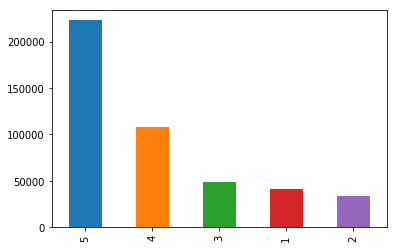

In [13]:
dataset.ratingValue.value_counts().plot('bar')

In [15]:
dataset.alias.value_counts()[:10]

mamas-fish-house-paia-9                                         6170
star-noodle-lahaina                                             4965
base-camp-pizza-south-lake-tahoe                                3786
coconuts-fish-cafe-kihei-4                                      3707
monkeypod-kitchen-by-merriman-kihei                             3647
da-kitchen-cafe-kahului                                         3362
slaters-50-50-huntington-beach-huntington-beach                 3242
shin-sen-gumi-hakata-ramen-fountain-valley-fountain-valley-8    3196
aloha-mixed-plate-lahaina                                       3167
the-donuttery-huntington-beach                                  3072
Name: alias, dtype: int64

## Yelp Business Info

In [16]:
dataset_businesses = pd.read_csv('../../data/raw/yp_competitors.csv')
len(dataset_businesses)

2547

In [18]:
dataset_businesses.head(3)

,alias,display_phone,dist_to_alias,distance,id,image_url,is_closed,name,phone,price,...,Cnt_Mon_Mar,Cnt_Mon_Apr,Cnt_Mon_May,Cnt_Mon_Jun,Cnt_Mon_Jul,Cnt_Mon_Aug,Cnt_Mon_Sep,Cnt_Mon_Oct,Cnt_Mon_Nov,Cnt_Mon_Dec
0,kimos-maui-lahaina,(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,Kimo's Maui,1.808661e+10,$$,...,189.0,189.0,242.0,218.0,250.0,265.0,233.0,266.0,201.0,176.0
1,lahaina-fish-lahaina,(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,Lahaina Fish,1.808661e+10,$$,...,109.0,153.0,164.0,165.0,161.0,212.0,193.0,179.0,152.0,196.0
2,blu-maui-lahaina,(808) 661-9591,kimos-maui-lahaina,14.320386,9I_XJDk_q1HVWRDiwRTwsg,NaN,False,Blu Maui,1.808662e+10,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Matching Records for Both Businesses and Reviews

In [5]:
dataset_businesses = dataset_businesses.loc[dataset_businesses.alias.isin(dataset.alias)]
len(set(dataset_businesses.alias))

2547

In [417]:
dataset_businesses.price.value_counts()

$$      944
$       678
$$$     116
$$$$     22
Name: price, dtype: int64

In [ ]:
dataset_businesses.head()

## Generated Business Info

### Generated for All

In [ ]:
from nltk import word_tokenize
from nltk import Text
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

# using nltk.Text object
def create_text(reviews):
    result = []
    for review in reviews:
        result.extend(word_tokenize(review))
    return Text(result)

def lexical_diversity(text):
    return round(len(set(text)) / len(text), 5)

def vocabulary_size(text):
    text.tokens = [x.lower() for x in text.tokens if x.isalpha()]
    vocab = len(set(text))
    return vocab

def content_size(tokens):
    sw_list = stopwords.words('english')
    content = [w for w in tokens if w.lower() not in sw_list]
    return round(len(content) / len(tokens), 5)

In [ ]:
reviews = create_text(dataset.description)

In [ ]:
_text = "".join(dataset.description)

In [ ]:
len(word_tokenize(_text))

In [ ]:
len(reviews.tokens)

In [ ]:
len(sent_tokenize(_text))

In [ ]:
vocabulary_size(reviews)

In [ ]:
lexical_diversity(reviews)

In [ ]:
sorted(reviews.vocab().most_common(10), reverse=True)

In [ ]:
maxlen = max(len(word) for word in reviews.tokens)
[word for word in reviews.tokens if len(word) == (maxlen)]

In [ ]:
fd = reviews.vocab()
cumulative = 0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

In [ ]:
reviews.dispersion_plot(["yum", "parking", "terrible", "hate", "clean", "kitchen", "staff", "manager"])

In [ ]:
reviews.vocab().plot(20, cumulative=50)

In [ ]:
reviews.vocab()["common"]

In [ ]:
content_size(reviews.tokens)

In [ ]:
some_words_freq = sorted(w for w in set(reviews.vocab()) if reviews.vocab()[w] > 3000 and reviews.vocab()[w] < 4000)
print(some_words_freq)

In [ ]:
from nltk import FreqDist
word_lengths = FreqDist(len(w) for w in reviews)
word_lengths.plot()

### Generated for Each Business

In [6]:
from nltk.corpus import stopwords
from string import punctuation
modals = ['can', 'will', 'must', 'should', 'might']
from nltk import sent_tokenize, word_tokenize
import random
import itertools

def generate_features(dataset, business):
    data = dataset.loc[dataset.alias == business].copy()
    data['sent_tokens'] = data.description.apply(lambda x: sent_tokenize(x))
    data['word_tokens'] = data.description.apply(lambda x: word_tokenize(x))
    data_sents = list(itertools.chain(*data.sent_tokens))
    data_words = list(itertools.chain(*data.word_tokens))
    data_cntnt = list(w for w in data_words if w.lower() not in stopwords.words('english'))
    data_vocab = set(i.lower() for i in data_words if i.isalpha())
    
    feature_list = {
        'alias': business,
        'review_count': len(data),
        "rating_avg": round(data.ratingValue.mean(), 4),
        "rating_sum": data.ratingValue.sum(),
        'num_of_sents': len(data_sents),
        'num_of_words': len(data_words),
        'num_of_vocab': len(data_vocab),
        'num_of_punctuation': len(list(i for i in data_words if i in punctuation)),
        'num_of_modals': len(list(i for i in data_words if i.lower() in modals)),
        'avg_words_in_sents': round((len(data_words) / len(data_sents)), 4),
        'ratio_content': round((len(data_cntnt) / len(data_words)), 4),
        'ratio_lexical': round((len(set(data_words)) / len(data_words)), 4)
    }
    
    return feature_list

In [7]:
# features for a sample
businesses = set(dataset.alias)
results_sample = list()

for i, business in enumerate(random.sample(businesses, 3)):
    features = generate_features(dataset, business)
    results_sample.append(features)
pd_info_sample = pd.DataFrame(results_sample)

In [8]:
# print sample 
pd_info_sample.sort_values("num_of_words", ascending=False)

,alias,avg_words_in_sents,num_of_modals,num_of_punctuation,num_of_sents,num_of_vocab,num_of_words,rating_avg,rating_sum,ratio_content,ratio_lexical,review_count
1,lorraine-shave-ice-kahakuloa-2,15.6731,76,1449,936,1791,14670,4.75,608,0.5758,0.1461,128
2,surf-city-grocers-huntington-beach,14.6364,2,119,55,331,805,3.90,39,0.6373,0.4770,10
0,scoop-shack-south-lake-tahoe,17.4000,0,11,5,58,87,2.00,2,0.7241,0.7816,1


In [11]:
# features for all 
businesses = set(dataset.alias)
results = []

for business in businesses:
    features = generate_features(dataset, business)
    results.append(features)
    
pd_info = pd.DataFrame(results)

In [409]:
pd_info.rename(columns={'review_count': 'num_of_reviews'}, inplace=True)

In [410]:
# print all ../../processed/raw/yp_competitors_info.csv
pd_info.to_csv("../../data/processed/yp_competitors_info.csv", index=False)
pd.read_csv("../../data/processed/yp_competitors_info.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
alias                 2556 non-null object
avg_words_in_sents    2556 non-null float64
num_of_modals         2556 non-null int64
num_of_punctuation    2556 non-null int64
num_of_sents          2556 non-null int64
num_of_vocab          2556 non-null int64
num_of_words          2556 non-null int64
rating_avg            2556 non-null float64
rating_sum            2556 non-null int64
ratio_content         2556 non-null float64
ratio_lexical         2556 non-null float64
num_of_reviews        2556 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 239.7+ KB


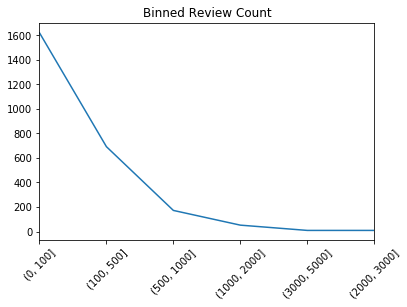

In [429]:
bins = [0, 100, 500, 1000, 2000, 3000, 5000]
lbls = [1, 2, 3, 4, 5, 6, 7, 8, 9]
pd_bins = pd.cut(pd_info.num_of_reviews, bins, lbls).value_counts()
pd_bins.plot(title='Binned Review Count').tick_params(axis='x', labelrotation=45)

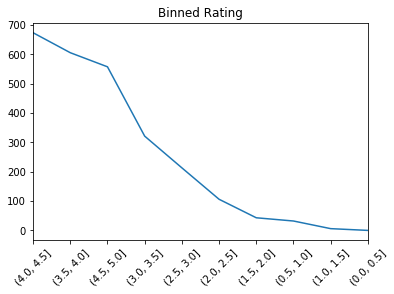

In [404]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
pd_bins = pd.cut(pd_info.rating_avg, bins).value_counts()
pd_bins.plot(title='Binned Rating').tick_params(axis='x', labelrotation=45)

## Time Analysis Business Info

In [25]:
from numpy import arange
from matplotlib import pyplot
import nltk
from nltk import ConditionalFreqDist
import datetime
# Debug only
# dataset = dataset.iloc[:5000, :]
dataset.shape

(454035, 5)

In [26]:
dataset.head()

,alias,ratingValue,dataPublished,description,author
0,underwater-discoveries-lahaina,5,2013-07-23,Sitting on the beach is one way to experience ...,Dawn B.
1,underwater-discoveries-lahaina,5,2011-07-01,I spent a lot of time on Yelp and Tripadvisor ...,Nora M.
2,underwater-discoveries-lahaina,5,2011-06-05,Went on my first snorkeling trip with these gu...,Beryl C.
3,underwater-discoveries-lahaina,5,2011-03-01,We are visiting Maui for two weeks - had made ...,Donna K.
4,underwater-discoveries-lahaina,5,2009-12-03,If you want to go on a snorkel trip and don't ...,nicky f.


### For All 

In [ ]:
cfdist = ConditionalFreqDist(
    (row.ratingValue, word)
    for i, row in dataset.iterrows()
    for word in word_tokenize(row.description)
    if word in modals
)

In [335]:
cfdist_ts_restaurants = ConditionalFreqDist(
    (row.ratingValue, word)
    for i, row in dataset[dataset.alias.isin(conditions)].iterrows()
    for word in word_tokenize(row.description)
    if word in modals
)

In [397]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']
# func
def bar_chart(categories, words, counts, title, ax):
    "Plot a bar chart showing counts for each word by category"
    colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = plt.bar(ind+c*width, counts[categories[c]], width, color=colors[c % len(colors)])
        bar_groups.append(bars)
    plt.xticks(ind+width, words)
    plt.legend([b[0] for b in bar_groups], categories, loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Frequency of Six Modal Verbs by Rating - ' + title)

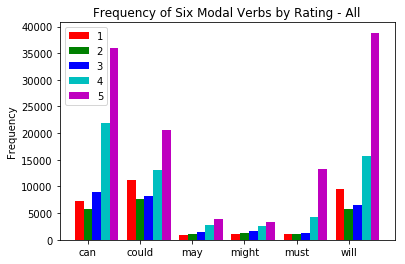

In [398]:
# total num of each modal
counts = {}
counts_ts = {}
for i in range(1, 6):
    counts[i] = [cfdist[i][word] for word in modals]
    counts_ts[i] = [cfdist_ts_restaurants[i][word] for word in modals]

bar_chart(range(1, 6), modals, counts, 'All', ax1)

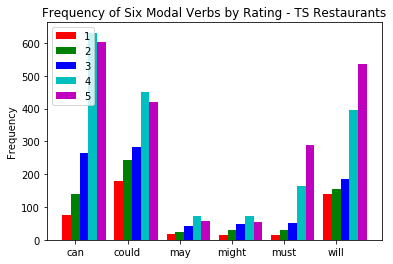

In [399]:
# total num of each modal
counts = {}
for i in range(1, 6):
    counts[i] = [cfdist_ts1

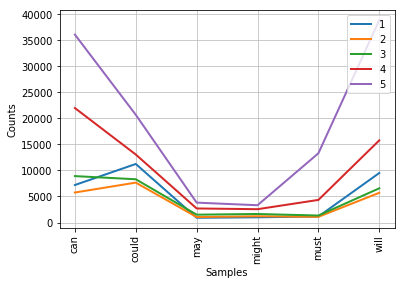

In [400]:
cfdist.plot(samples=modals, conditions=range(1,6))

In [177]:
cfdist.tabulate(samples=modals)

    can could   may might  must  will 
1  7200 11234   908  1002  1152  9503 
2  5759  7657  1055  1205  1094  5709 
3  8907  8301  1506  1641  1340  6564 
4 21964 13045  2698  2558  4339 15765 
5 36057 20668  3816  3319 13288 38835 


###  For Each Business

In [27]:
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dataset["day"] = dataset.dataPublished.apply(lambda x: x.strftime("%a"))
cfd_days = ConditionalFreqDist(
    (business.alias, business.day) 
    for index, business in dataset.iterrows()
)

In [143]:
pd_days = pd.DataFrame.from_dict(cfd_days, orient='index', dtype=int).fillna(0)
pd_days.columns = 'Cnt_Day_' + pd_days.columns
pd_days.reset_index(level=0, inplace=True)
pd_days.rename(columns={'index': 'alias'}, inplace=True)

pd_days.to_csv("../../data/processed/yp_competitors_day.csv", index=False)
pd_days.head()

,alias,Cnt_Day_Tue,Cnt_Day_Fri,Cnt_Day_Sun,Cnt_Day_Thu,Cnt_Day_Sat,Cnt_Day_Wed,Cnt_Day_Mon
0,1-800-snorkel-kihei,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1054togoshi-kihei,18.0,25.0,32.0,18.0,24.0,13.0,12.0
2,11th-frame-diner-south-lake-tahoe,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1862-david-walleys-restaurant-and-saloon-genoa-2,24.0,19.0,30.0,16.0,13.0,17.0,21.0
4,1882-bar-and-grill-truckee-2,24.0,15.0,23.0,19.0,28.0,30.0,26.0


In [147]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sorted_columns_d = []
for day in days:
    val = [i for i in pd_days.columns if day in i]
    sorted_columns_d.append(''.join(val))
pd_days = pd_days.reindex(['alias'] + sorted_columns_d, axis=1)

In [148]:
pd_days.head()

,alias,Cnt_Day_Mon,Cnt_Day_Tue,Cnt_Day_Wed,Cnt_Day_Thu,Cnt_Day_Fri,Cnt_Day_Sat,Cnt_Day_Sun
0,1-800-snorkel-kihei,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1054togoshi-kihei,12.0,18.0,13.0,18.0,25.0,24.0,32.0
2,11th-frame-diner-south-lake-tahoe,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1862-david-walleys-restaurant-and-saloon-genoa-2,21.0,24.0,17.0,16.0,19.0,13.0,30.0
4,1882-bar-and-grill-truckee-2,26.0,24.0,30.0,19.0,15.0,28.0,23.0


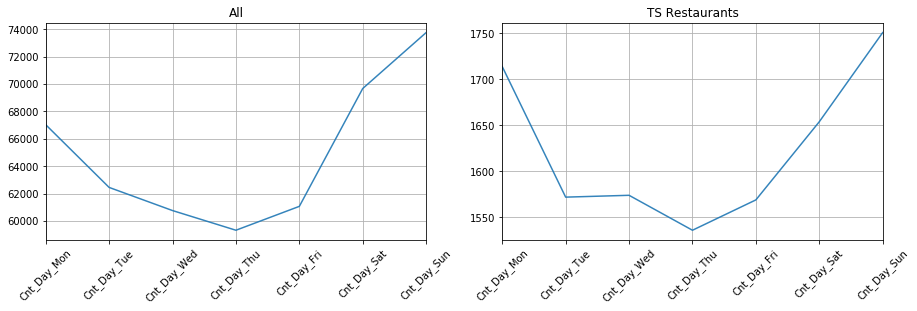

In [423]:
# Overall Dataset
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
k = pd_days.iloc[:, 1:].sum().plot(
    alpha=0.90, rot=45, xticks=range(7), grid=True, ax=ax1, title="All"
)
l = pd_days[pd_days.alias.isin(conditions)].iloc[:, 1:].sum().plot(
    alpha=0.90, rot=45, xticks=range(7), grid=True, ax=ax2, title="TS Restaurants"
)

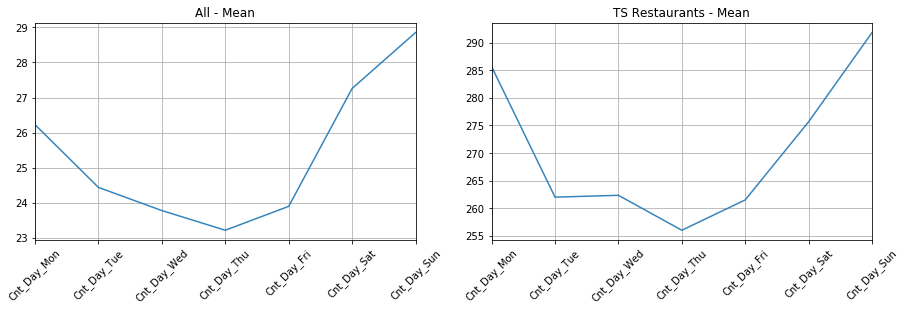

In [422]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
k = pd_days.iloc[:, 1:].mean().plot(
    alpha=0.90, rot=45, xticks=range(7), grid=True, ax=ax1, title="All - Mean"
)
l = pd_days[pd_days.alias.isin(conditions)].iloc[:, 1:].mean().plot(
    alpha=0.90, rot=45, xticks=range(7), grid=True, ax=ax2, title="TS Restaurants - Mean"
)

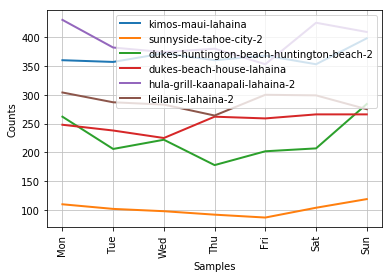

In [167]:
cfd_days.plot(conditions=conditions, samples=days)

In [168]:
cfd_days.tabulate(samples=days, conditions=conditions)

                                          Mon Tue Wed Thu Fri Sat Sun 
                       kimos-maui-lahaina 360 357 372 360 368 353 398 
                   sunnyside-tahoe-city-2 110 102  98  92  87 104 119 
dukes-huntington-beach-huntington-beach-2 262 206 222 178 202 207 284 
                dukes-beach-house-lahaina 248 238 225 262 259 266 266 
           hula-grill-kaanapali-lahaina-2 430 382 374 380 353 425 409 
                       leilanis-lahaina-2 304 287 283 264 300 299 275 


In [128]:
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dataset["mon"] = dataset.dataPublished.apply(lambda x: x.strftime("%b"))
cfd = ConditionalFreqDist(
    (business.alias, business.mon) 
    for index, business in dataset.iterrows()
)

In [273]:
pd_months = pd.DataFrame.from_dict(cfd, orient='index', dtype=int).fillna(0)
pd_months.columns = 'Cnt_Mon_' + pd_months.columns
pd_months.reset_index(level=0, inplace=True)
pd_months.rename(columns={'index': 'alias'}, inplace=True)

pd_months.to_csv("../../data/processed/yp_competitors_mon.csv", index=False)
pd_months.head()

,alias,Cnt_Mon_Jul,Cnt_Mon_Jun,Cnt_Mon_Mar,Cnt_Mon_Dec,Cnt_Mon_Nov,Cnt_Mon_Sep,Cnt_Mon_Aug,Cnt_Mon_May,Cnt_Mon_Apr,Cnt_Mon_Jan,Cnt_Mon_Oct,Cnt_Mon_Feb
0,1-800-snorkel-kihei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1054togoshi-kihei,8.0,19.0,13.0,10.0,9.0,12.0,12.0,22.0,14.0,10.0,6.0,7.0
2,11th-frame-diner-south-lake-tahoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1862-david-walleys-restaurant-and-saloon-genoa-2,11.0,9.0,15.0,11.0,13.0,12.0,14.0,13.0,13.0,7.0,9.0,13.0
4,1882-bar-and-grill-truckee-2,24.0,15.0,16.0,14.0,9.0,12.0,17.0,10.0,10.0,22.0,6.0,10.0


In [274]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sorted_columns = []
for mon in months:
    val = [i for i in pd_months.columns if mon in i]
    sorted_columns.append(''.join(val))
pd_months = pd_months.reindex(['alias'] + sorted_columns, axis=1)

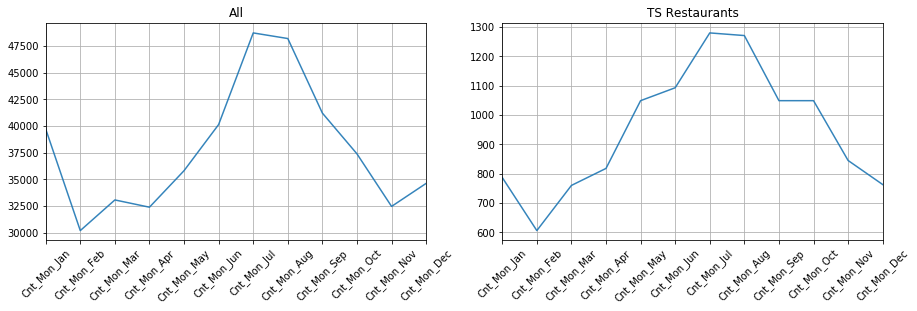

In [281]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
k = pd_months.iloc[:, 1:].sum().plot(
    alpha=0.90, rot=45, xticks=range(12), grid=True, ax=ax1, title="All"
)
l = pd_months[pd_months.alias.isin(conditions)].iloc[:, 1:].sum().plot(
    alpha=0.90, rot=45, xticks=range(12), grid=True, ax=ax2, title="TS Restaurants"
)

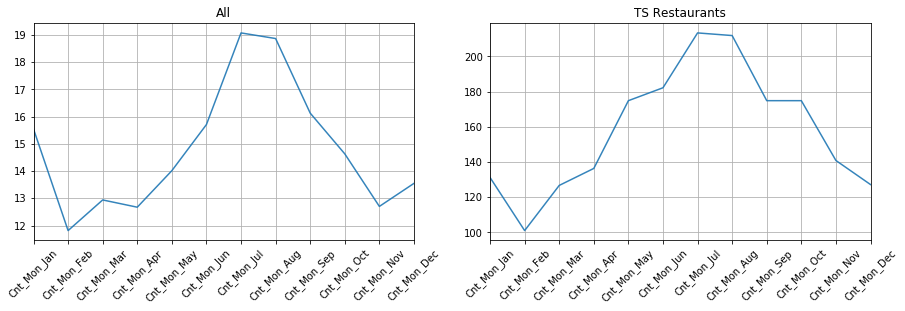

In [282]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
k = pd_months.iloc[:, 1:].mean().plot(
    alpha=0.90, rot=45, xticks=range(12), grid=True, ax=ax1, title="All"
)
l = pd_months[pd_months.alias.isin(conditions)].iloc[:, 1:].mean().plot(
    alpha=0.90, rot=45, xticks=range(12), grid=True, ax=ax2, title="TS Restaurants"
)

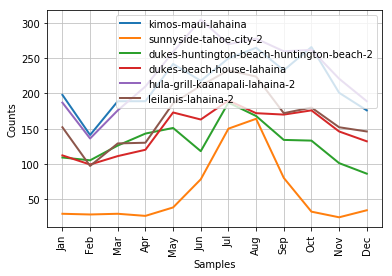

In [420]:
cfd.plot(conditions=conditions, samples=months)

In [171]:
cfd.tabulate(conditions=conditions, samples=months)

                                          Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec 
                       kimos-maui-lahaina 198 141 189 189 242 218 250 265 233 266 201 176 
                   sunnyside-tahoe-city-2  29  28  29  26  38  78 150 164  80  32  24  34 
dukes-huntington-beach-huntington-beach-2 109 105 126 143 151 118 187 168 134 133 101  86 
                dukes-beach-house-lahaina 112  99 111 120 173 163 190 172 170 176 146 132 
           hula-grill-kaanapali-lahaina-2 187 136 176 210 259 305 270 278 260 262 221 189 
                       leilanis-lahaina-2 152  97 129 130 186 211 233 224 172 180 152 146 


## Time Plots

### For All

In [286]:
pd.to_timedelta(5, unit='D')

Timedelta('5 days 00:00:00')

In [287]:
dataset['date_5_days_ago'] = pd.to_datetime(dataset['dataPublished']) - pd.to_timedelta(5, unit='d')

In [331]:
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dfgb = dataset.groupby([pd.Grouper(key="dataPublished", freq="Q-DEC")])

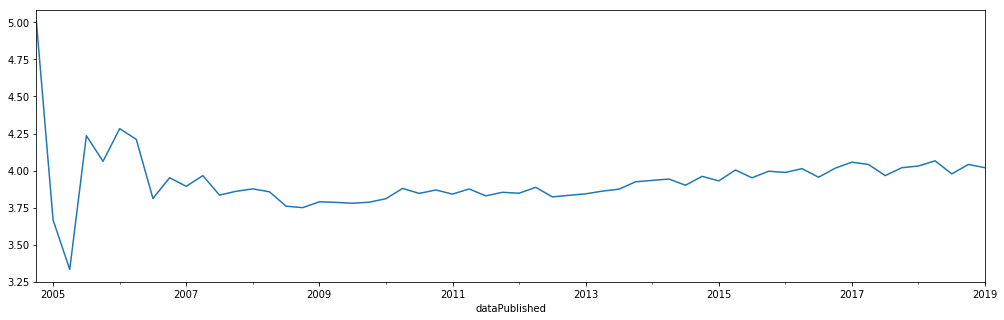

In [332]:
dfgb_mean = dfgb.ratingValue.mean()
dfgb_mean[dfgb_mean.index > datetime.datetime(2000, 1, 1)].plot('line', figsize=(17, 5))

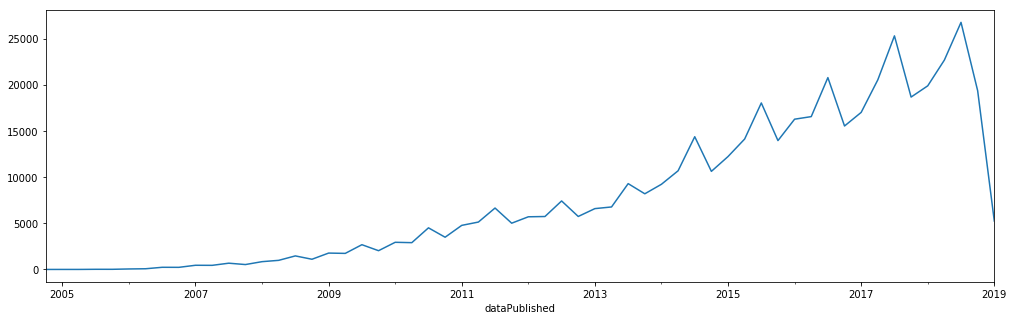

In [333]:
dfgb_mean = dfgb.ratingValue.count()
dfgb_mean[dfgb_mean.index > datetime.datetime(2000, 1, 1)].plot('line', figsize=(17, 5))

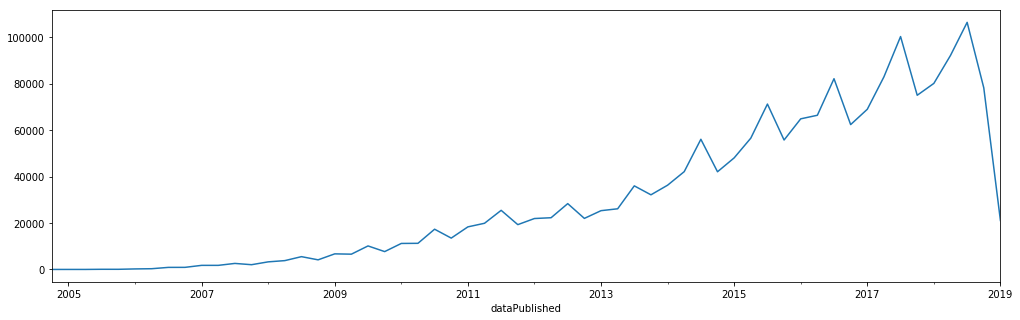

In [334]:
dfgb_mean = dfgb.ratingValue.sum()
dfgb_mean[dfgb_mean.index > datetime.datetime(2000, 1, 1)].plot('line', figsize=(17, 5))

In [ ]:
a = pd.DataFrame()
a['raw'] = dataset.dataPublished
a['edited'] = dataset.dataPublished.apply(lambda t: t.to_period(freq='M'))
a.head()

In [ ]:
a = pd.DataFrame()
a['raw'] = dataset.dataPublished
a['edited'] = dataset.groupby([pd.Grouper(key="dataPublished", freq="W-MON")])
a.head()

In [ ]:
dataset.iloc[:100,0:].groupby([pd.Grouper(key="dataPublished", freq="W-MON")]).head()

### For TS Restaurants

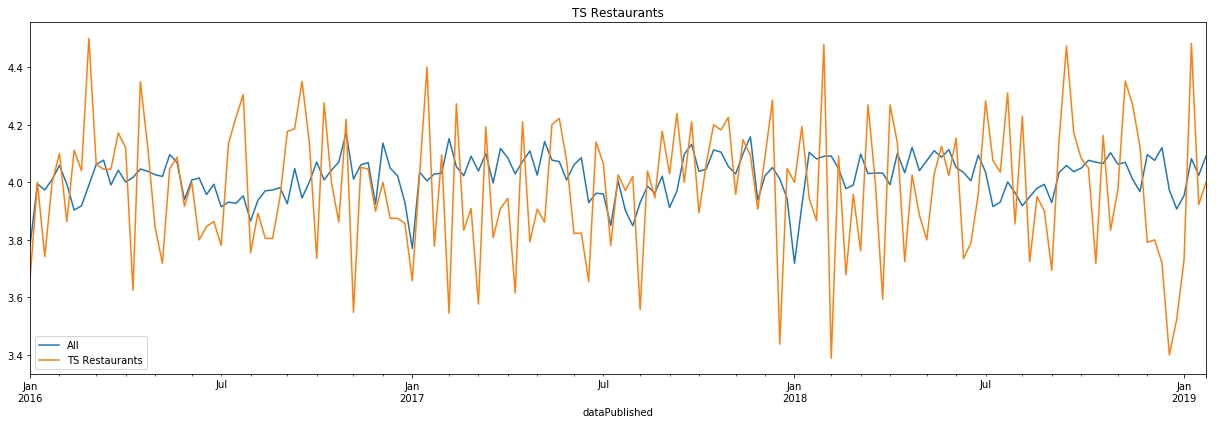

In [406]:
fig = plt.figure(figsize=(17, 6))
ax = fig.add_subplot()
desired_date = datetime.datetime(2016, 1, 1)

a = dataset.groupby([pd.Grouper(key="dataPublished", freq="W-MON")])['ratingValue'].mean()
a.name = 'All'
b = dataset.loc[dataset.alias.isin(conditions)].groupby([pd.Grouper(key="dataPublished", freq="W-MON")])['ratingValue'].mean()
b.name = 'TS Restaurants'
a[a.index > desired_date].plot('line', title="All", ax=ax)
b[b.index > desired_date].plot('line', title="TS Restaurants", ax=ax)
plt.legend()
plt.tight_layout()

## Merging DataFrames

In [411]:
dataset_businesses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2547 entries, 0 to 2554
Data columns (total 26 columns):
alias                       2547 non-null object
display_phone               2138 non-null object
dist_to_alias               2547 non-null object
distance                    2547 non-null float64
id                          2547 non-null object
image_url                   2442 non-null object
is_closed                   2547 non-null bool
name                        2547 non-null object
phone                       2138 non-null float64
price                       1760 non-null object
rating                      2547 non-null float64
review_count                2547 non-null int64
transactions                224 non-null object
url                         2547 non-null object
category_alias              2547 non-null object
category_title              2547 non-null object
coordinate_latitude         2547 non-null float64
coordinate_longitude        2547 non-null float64
location_a

In [412]:
pd_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
alias                 2556 non-null object
avg_words_in_sents    2556 non-null float64
num_of_modals         2556 non-null int64
num_of_punctuation    2556 non-null int64
num_of_sents          2556 non-null int64
num_of_vocab          2556 non-null int64
num_of_words          2556 non-null int64
rating_avg            2556 non-null float64
rating_sum            2556 non-null int64
ratio_content         2556 non-null float64
ratio_lexical         2556 non-null float64
num_of_reviews        2556 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 239.7+ KB


In [413]:
pd_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 8 columns):
alias          2556 non-null object
Cnt_Day_Mon    2556 non-null float64
Cnt_Day_Tue    2556 non-null float64
Cnt_Day_Wed    2556 non-null float64
Cnt_Day_Thu    2556 non-null float64
Cnt_Day_Fri    2556 non-null float64
Cnt_Day_Sat    2556 non-null float64
Cnt_Day_Sun    2556 non-null float64
dtypes: float64(7), object(1)
memory usage: 159.8+ KB


In [414]:
pd_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 13 columns):
alias          2556 non-null object
Cnt_Mon_Jan    2556 non-null float64
Cnt_Mon_Feb    2556 non-null float64
Cnt_Mon_Mar    2556 non-null float64
Cnt_Mon_Apr    2556 non-null float64
Cnt_Mon_May    2556 non-null float64
Cnt_Mon_Jun    2556 non-null float64
Cnt_Mon_Jul    2556 non-null float64
Cnt_Mon_Aug    2556 non-null float64
Cnt_Mon_Sep    2556 non-null float64
Cnt_Mon_Oct    2556 non-null float64
Cnt_Mon_Nov    2556 non-null float64
Cnt_Mon_Dec    2556 non-null float64
dtypes: float64(12), object(1)
memory usage: 259.7+ KB


In [415]:
merged = pd.merge(dataset_businesses, pd_info, on='alias').merge(pd_days, on='alias').merge(pd_months, on='alias')
print(merged.columns)

Index(['alias', 'display_phone', 'dist_to_alias', 'distance', 'id',
       'image_url', 'is_closed', 'name', 'phone', 'price', 'rating',
       'review_count', 'transactions', 'url', 'category_alias',
       'category_title', 'coordinate_latitude', 'coordinate_longitude',
       'location_address1', 'location_address2', 'location_address3',
       'location_city', 'location_zip_code', 'location_country',
       'location_state', 'location_display_address', 'avg_words_in_sents',
       'num_of_modals', 'num_of_punctuation', 'num_of_sents', 'num_of_vocab',
       'num_of_words', 'rating_avg', 'rating_sum', 'ratio_content',
       'ratio_lexical', 'num_of_reviews', 'Cnt_Day_Mon', 'Cnt_Day_Tue',
       'Cnt_Day_Wed', 'Cnt_Day_Thu', 'Cnt_Day_Fri', 'Cnt_Day_Sat',
       'Cnt_Day_Sun', 'Cnt_Mon_Jan', 'Cnt_Mon_Feb', 'Cnt_Mon_Mar',
       'Cnt_Mon_Apr', 'Cnt_Mon_May', 'Cnt_Mon_Jun', 'Cnt_Mon_Jul',
       'Cnt_Mon_Aug', 'Cnt_Mon_Sep', 'Cnt_Mon_Oct', 'Cnt_Mon_Nov',
       'Cnt_Mon_Dec'],
      dt

In [416]:
merged.to_csv('../../data/processed/yp_competitors.csv', index=False, header=True)